In [4]:
import warnings
warnings.filterwarnings('ignore')

import os
import gzip
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

np.random.seed(123)

import string
import nltk
from nltk.corpus import stopwords
from nltk.text import TextCollection
from nltk.collocations import BigramCollocationFinder
from nltk.metrics.association import BigramAssocMeasures

import sklearn
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

from tqdm import tqdm
tqdm.pandas()

import watermark

# For Jupyter notebooks (optional, if using Jupyter)
%load_ext watermark


The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [1]:
import collections
import multiprocessing as mp
import re
import nltk

In [5]:
text = """Mary had a little lamb, little lamb, little lamb. 
'Mary' had a little lamb whose fleece was white as snow. and 
everywhere that mary went mary went, mary went. Everywhere that Mary went, 
The lamb was sure to go """

In [6]:
tokens = nltk.word_tokenize(text, 'english')

In [7]:
print(tokens)

['Mary', 'had', 'a', 'little', 'lamb', ',', 'little', 'lamb', ',', 'little', 'lamb', '.', "'Mary", "'", 'had', 'a', 'little', 'lamb', 'whose', 'fleece', 'was', 'white', 'as', 'snow', '.', 'and', 'everywhere', 'that', 'mary', 'went', 'mary', 'went', ',', 'mary', 'went', '.', 'Everywhere', 'that', 'Mary', 'went', ',', 'The', 'lamb', 'was', 'sure', 'to', 'go']


In [8]:
sentences = nltk.sent_tokenize(text, 'english')

sentences

['Mary had a little lamb, little lamb, little lamb.',
 "'Mary' had a little lamb whose fleece was white as snow.",
 'and \neverywhere that mary went mary went, mary went.',
 'Everywhere that Mary went, \nThe lamb was sure to go']

In [9]:
print(tokens[5])
print(tokens[12])
print(tokens[13])

,
'Mary
'


In [10]:
tokens = nltk.tokenize.WordPunctTokenizer().tokenize(text)

In [11]:
print(tokens[5])
print(tokens[12])
print(tokens[13])
print(tokens[14])

,
'
Mary
'


In [12]:
def tokenize(text, preserve_case=True):
    punctuation = set(string.punctuation)
    text_words = []

    for word in nltk.tokenize.WordPunctTokenizer().tokenize(text):

        if word in punctuation:
            continue

        if preserve_case:
            text_words.append(word)
        else:
            text_words.append(word.lower())
    
    return text_words

In [13]:
text_words = tokenize(text, False)
text_words

['mary',
 'had',
 'a',
 'little',
 'lamb',
 'little',
 'lamb',
 'little',
 'lamb',
 'mary',
 'had',
 'a',
 'little',
 'lamb',
 'whose',
 'fleece',
 'was',
 'white',
 'as',
 'snow',
 'and',
 'everywhere',
 'that',
 'mary',
 'went',
 'mary',
 'went',
 'mary',
 'went',
 'everywhere',
 'that',
 'mary',
 'went',
 'the',
 'lamb',
 'was',
 'sure',
 'to',
 'go']

In [14]:
# we can get a quick one-hot encoded version using pandas: 
one_hot = pd.get_dummies(text_words)
temp = one_hot.replace({True: '1', False: ''})
print(temp)

    a and as everywhere fleece go had lamb little mary snow sure that the to  \
0                                                    1                         
1                                   1                                          
2   1                                                                          
3                                               1                              
4                                        1                                     
5                                               1                              
6                                        1                                     
7                                               1                              
8                                        1                                     
9                                                    1                         
10                                  1                                          
11  1                                   

In [15]:
# word_dict = dict(zip(one_hot.columns, np.arange(one_hot.shape[1])))
word_dict = dict(zip(one_hot.columns, map(int, np.arange(one_hot.shape[1]))))

print(word_dict)

{'a': 0, 'and': 1, 'as': 2, 'everywhere': 3, 'fleece': 4, 'go': 5, 'had': 6, 'lamb': 7, 'little': 8, 'mary': 9, 'snow': 10, 'sure': 11, 'that': 12, 'the': 13, 'to': 14, 'was': 15, 'went': 16, 'white': 17, 'whose': 18}


In [16]:
# bag of words presentation
pd.DataFrame(one_hot.sum(), columns=['Count'])

,Count
a,2
and,1
as,1
everywhere,2
fleece,1
go,1
had,2
lamb,5
little,4
mary,6


In [18]:
stop_words = set(stopwords.words('english'))

tokens = tokenize(text)
filtered_sentence = [word if word.lower() not in stop_words else "" for word in tokens]
pd.DataFrame((zip(tokens, filtered_sentence)), columns = ['Original', 'Filtered']).set_index('Original')

,Filtered
Original,
Mary,Mary
had,
a,
little,little
lamb,lamb
little,little
lamb,lamb
little,little
lamb,lamb


In [19]:
# TF/IDF 
corpus = nltk.sent_tokenize(text)
len(corpus)

4

In [20]:
corpus = [tokenize(doc, preserve_case=False) for doc in corpus]
corpus

[['mary', 'had', 'a', 'little', 'lamb', 'little', 'lamb', 'little', 'lamb'],
 ['mary',
  'had',
  'a',
  'little',
  'lamb',
  'whose',
  'fleece',
  'was',
  'white',
  'as',
  'snow'],
 ['and', 'everywhere', 'that', 'mary', 'went', 'mary', 'went', 'mary', 'went'],
 ['everywhere',
  'that',
  'mary',
  'went',
  'the',
  'lamb',
  'was',
  'sure',
  'to',
  'go']]

<Axes: xlabel='Samples', ylabel='Counts'>

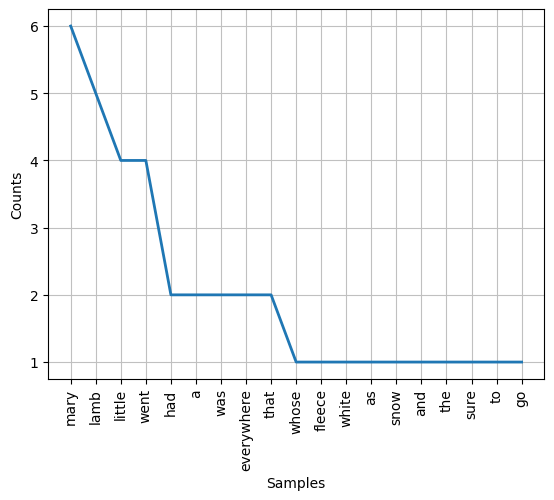

In [22]:
nlp = TextCollection(corpus)
nlp.plot()

In [23]:
nlp.tf_idf('Mary', corpus[3])

0.0

In [24]:
TFIDF = []

for doc in corpus:
    current = {}
    for token in doc:
        current[token] = nlp.tf_idf(token, doc)
        
    TFIDF.append(current)

In [25]:
TFIDF

[{'mary': 0.0,
  'had': 0.07701635339554948,
  'a': 0.07701635339554948,
  'little': 0.23104906018664842,
  'lamb': 0.09589402415059362},
 {'mary': 0.0,
  'had': 0.06301338005090412,
  'a': 0.06301338005090412,
  'little': 0.06301338005090412,
  'lamb': 0.026152915677434625,
  'whose': 0.12602676010180824,
  'fleece': 0.12602676010180824,
  'was': 0.06301338005090412,
  'white': 0.12602676010180824,
  'as': 0.12602676010180824,
  'snow': 0.12602676010180824},
 {'and': 0.15403270679109896,
  'everywhere': 0.07701635339554948,
  'that': 0.07701635339554948,
  'mary': 0.0,
  'went': 0.23104906018664842},
 {'everywhere': 0.06931471805599453,
  'that': 0.06931471805599453,
  'mary': 0.0,
  'went': 0.06931471805599453,
  'the': 0.13862943611198905,
  'lamb': 0.028768207245178087,
  'was': 0.06931471805599453,
  'sure': 0.13862943611198905,
  'to': 0.13862943611198905,
  'go': 0.13862943611198905}]

In [26]:
def get_ngrams(text, length):
    from nltk.util import ngrams

    n_grams = ngrams(tokenize(text), length)
    return[' '.join(grams) for grams in n_grams]


In [29]:
get_ngrams(text.lower(), 2)

['mary had',
 'had a',
 'a little',
 'little lamb',
 'lamb little',
 'little lamb',
 'lamb little',
 'little lamb',
 'lamb mary',
 'mary had',
 'had a',
 'a little',
 'little lamb',
 'lamb whose',
 'whose fleece',
 'fleece was',
 'was white',
 'white as',
 'as snow',
 'snow and',
 'and everywhere',
 'everywhere that',
 'that mary',
 'mary went',
 'went mary',
 'mary went',
 'went mary',
 'mary went',
 'went everywhere',
 'everywhere that',
 'that mary',
 'mary went',
 'went the',
 'the lamb',
 'lamb was',
 'was sure',
 'sure to',
 'to go']

In [ ]:
# collections
bigrams = BigramCollocationFinder.from_words(tokenize(text, False))


In [32]:
scored_bigrams = bigrams.score_ngrams(BigramAssocMeasures.likelihood_ratio)


In [41]:
scored_bigrams

[(('little', 'lamb'), 20.789064969512467),
 (('mary', 'went'), 18.154919185356587),
 (('everywhere', 'that'), 15.777294140200038),
 (('had', 'a'), 15.777294140200038),
 (('a', 'little'), 10.232116695720478),
 (('as', 'snow'), 9.301260258907092),
 (('snow', 'and'), 9.301260258907092),
 (('sure', 'to'), 9.301260258907092),
 (('to', 'go'), 9.301260258907092),
 (('white', 'as'), 9.301260258907092),
 (('whose', 'fleece'), 9.301260258907092),
 (('mary', 'had'), 8.139124120662284),
 (('that', 'mary'), 8.139124120662284),
 (('and', 'everywhere'), 6.528671536667327),
 (('fleece', 'was'), 6.528671536667327),
 (('was', 'sure'), 6.528671536667327),
 (('was', 'white'), 6.528671536667327),
 (('went', 'the'), 4.802579101956642),
 (('lamb', 'whose'), 4.297236023525216),
 (('the', 'lamb'), 4.297236023525216),
 (('lamb', 'little'), 3.850143362325084),
 (('went', 'mary'), 3.065215528887738),
 (('went', 'everywhere'), 2.196764352889584),
 (('lamb', 'was'), 1.7502532877068806),
 (('lamb', 'mary'), 0.088193

Word embeddings: we start by loading pre-computed word embeddings. Here we're using embeddings obtained with GloVE 

In [45]:
word_dict = {}
word_list = []

embeddings = np.zeros((400000, 50), dtype='float32')

count = 0 

with open('data/glove.6B.50d.txt', 'r', encoding='utf8') as fp:
    for line in tqdm(fp):
        fields = line.split()
        word = fields[0]
        word_list.append(word)
        word_dict[word] = count
        embeddings[count] = np.asarray(fields[1:], dtype='float32')
        count += 1


400000it [00:07, 56013.07it/s]


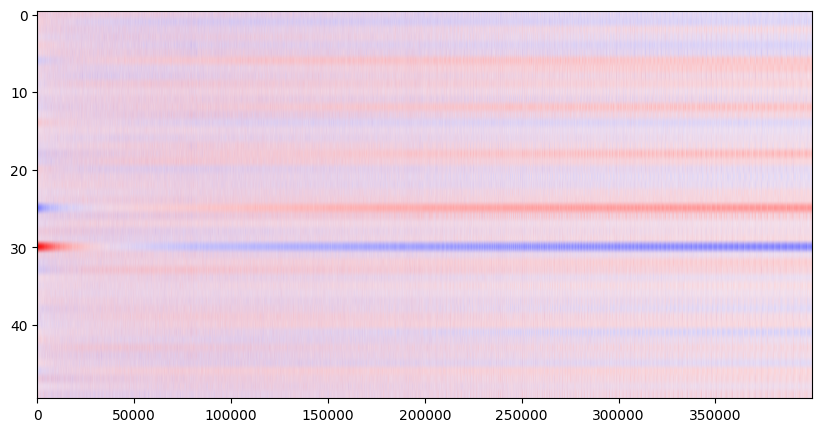

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(embeddings.T, aspect=4000, cmap=plt.cm.seismic)
ax.grid(False)
plt.show()


In [48]:
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
plot_only = 500 
low_dim_embs = tsne.fit_transform(np.array(embeddings)[:plot_only, :])

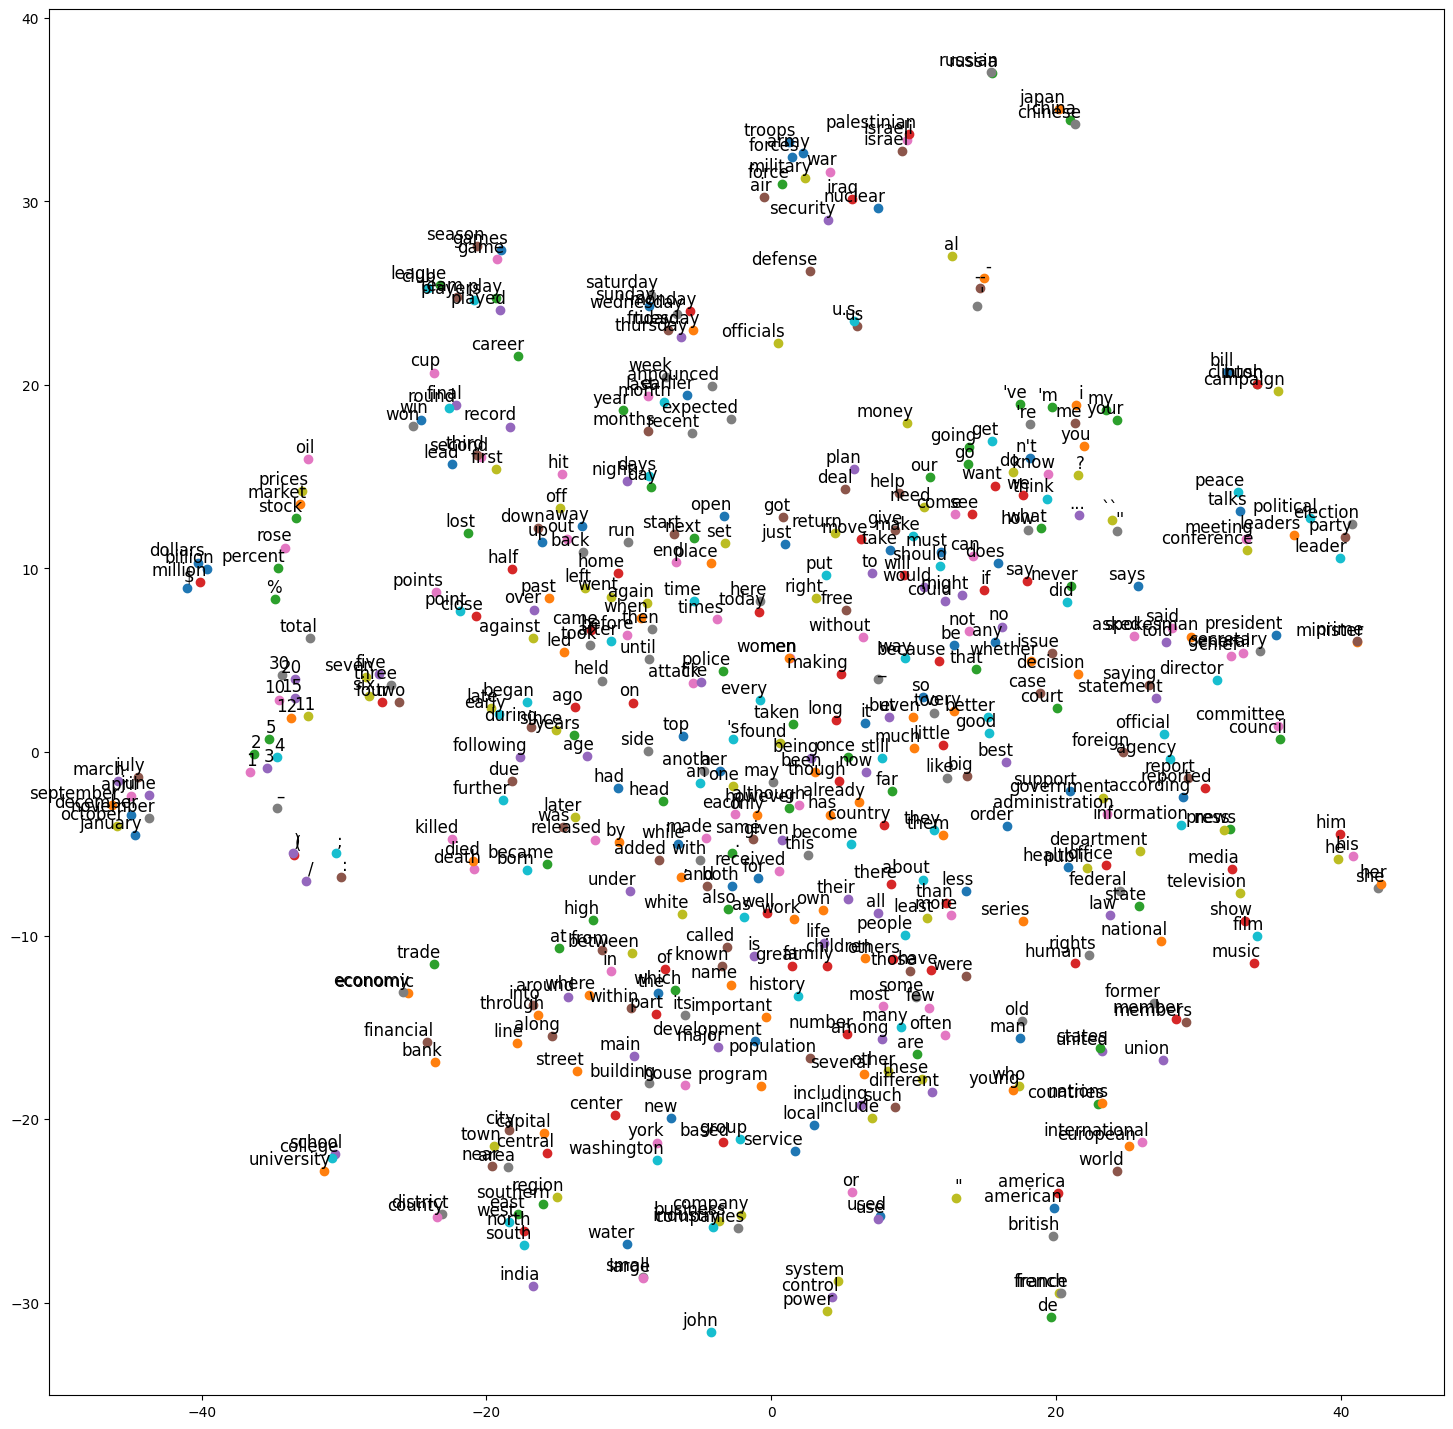

In [49]:
labels = [word_list[i] for i in range(plot_only)]

plt.figure(figsize=(18,18))
for i, label in enumerate(labels):
    x, y = low_dim_embs[i, :]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right',va='bottom',fontsize=12)

In [50]:
cosine_similarity(embeddings[word_dict['king']].reshape(1, -1),
                  embeddings[word_dict['prince']].reshape(1, -1))

array([[0.823618]], dtype=float32)

In [51]:
cosine_similarity(embeddings[word_dict['blue']].reshape(1, -1),
                  embeddings[word_dict['null']].reshape(1, -1))

array([[-0.05102889]], dtype=float32)